# Project: Investigate a Dataset - Medical Appointment No shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**Selected dataset**: [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- **`PatientId`**: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.

- **`AppointmentID`**: indicates appoint ID, this field should be unique
- **`Gender`**: indicates the patient's gender (M/F)
- **`ScheduledDay`**: indicates the Date/Time the patient set up their appointment.
- **`AppointmentDay`**:  indicates the date/time the patient called to book their appointment.
- **`Age`**: indicates the patient's age.
- **`Neighborhood`**: indicates the location of the hospital.
- **`Scholarship`**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- **`Hipertension`**: indicates whether or not the patient is experiencing Hypertension.
- **`Diabetes`**: indicates whether or not the patient is experiencing Diabetes.
- **`Alcoholism`**: indicates whether or not the patient is experiencing Alcoholism.
- **`Handcap`**: indicates whether or not the patient is with special needs.
- **`SMS_received`**: indicates whether or not the patient has received a reminder text message.
- **`Show-up`**: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Why this Dataset?

What interests me about this dataset is that it is more close to everyone. Once people have to reserve something, there will be a no-show. So, it aroused my curiosity to find out what factors are more important in affecting the no-show rate.

### Question(s) for Analysis

The major problem that we want to know is:
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

So we ask some questions below in order to find the answer:
1. What is the overall percentage of no-show appointments?
2. Is there a difference in the no-show rates between male and female patients?
3. Is there a relationship between the time gap from scheduling an appointment to the actual appointment and the likelihood of a no-show?
4. How does the age of the patient correlate with the likelihood of a no-show?
5. Are there specific neighborhoods where the no-show rate is higher?(Top 5)
6. Does having a scholarship (Bolsa Família) influence the likelihood of a no-show?
7. Is there a relationship between each health conditions (e.g., hypertension, diabetes) and no-show appointments?
8. Which health condition combinations affect no-show appointments the most?¶
9. Does receiving one or more SMS messages affect the no-show rate?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check which columns have missing values with info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# View dimensions of dataset.
df.shape

(110527, 14)

In [5]:
# View missing value count for each column.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Check whether there have duplicated data or not
sum(df.duplicated())

0

Looking at the above, we can find some issues with incorrect spelling and data type. In the next section, we will fix these problems.


### Data Cleaning

In [7]:
# Rename the wrong spelling.
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)

#confirm changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
# Replace hyphen with underscores and lowercase labels for dataset.
df.rename(columns=lambda x: x.strip().lower().replace('-', '_'), inplace=True)

# confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
# Change the datatype from object to datetime.
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

# Confirm changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

### Data Type Optimization
Check how many unique values in each columns.

In [10]:
df.handicap.unique()

array([0, 1, 2, 3, 4])

In [11]:
df.neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [12]:
df.scholarship.unique()

array([0, 1])

In [13]:
df.hypertension.unique()

array([1, 0])

In [14]:
df.diabetes.unique()

array([0, 1])

In [15]:
df.alcoholism.unique()

array([0, 1])

In [16]:
df.sms_received.unique()

array([0, 1])

In [17]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

Except for `neighbourhood`, other columns like `scholarship`, `hypertension`, `diabetes`, `alcoholism`, `handicap`, `sms_received`, `no_show` have 2-4 unique values. But there is only no_show suit to be the category type because others, as the integer type, are easier to sort.

In [18]:
df["no_show"] = df["no_show"].astype("category")

In [19]:
# df info to view data type and memory usage changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [20]:
# rename the no_show values for readibility
df['no_show'] = df['no_show'].cat.rename_categories(['Show', 'No Show'])
df.no_show.unique()

['Show', 'No Show']
Categories (2, object): ['Show', 'No Show']

In [21]:
# Create a new column to see the interval between appointmentday and scheduledday.
df['daysbetween'] = (df['appointmentday'] - df['scheduledday']).dt.days
# Both appointmentday and scheduledday were the same day will become -1, so we adjusted this to 0.
df['daysbetween'] = df['daysbetween'].clip(lower=0)

In [22]:
# Check all the unique number.
df['daysbetween'].unique()

array([  0,   1,   2,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

In [23]:
# Create an interval in 30 days.
bins = list(range(0, df['daysbetween'].max() + 31, 30))

# Define labels for each interval.
labels = [f"{start}-{start+29} days" for start in bins[:-1]]

# Create a new column 'Interval' based on the bins.
df['days_interval'] = pd.cut(df['daysbetween'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'Interval' column.
print(df[['scheduledday', 'appointmentday', 'daysbetween', 'days_interval']])

                    scheduledday            appointmentday  daysbetween  \
0      2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00            0   
1      2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00            0   
2      2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00            0   
3      2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00            0   
4      2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00            0   
...                          ...                       ...          ...   
110522 2016-05-03 09:15:35+00:00 2016-06-07 00:00:00+00:00           34   
110523 2016-05-03 07:27:33+00:00 2016-06-07 00:00:00+00:00           34   
110524 2016-04-27 16:03:52+00:00 2016-06-07 00:00:00+00:00           40   
110525 2016-04-27 15:09:23+00:00 2016-06-07 00:00:00+00:00           40   
110526 2016-04-27 13:30:56+00:00 2016-06-07 00:00:00+00:00           40   

       days_interval  
0          0-29 days  
1          0-29 days  
2          0-29 days  
3      

In [24]:
# Check the unique of interval.
df['days_interval'].unique()

['0-29 days', '30-59 days', '60-89 days', '90-119 days', '150-179 days', '120-149 days']
Categories (6, object): ['0-29 days' < '30-59 days' < '60-89 days' < '90-119 days' < '120-149 days' < '150-179 days']

In [25]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [26]:
# Create the 'age_group' column

# Create an interval in 20.
bins = list(range(0, df['age'].max() + 21, 20))

# Replace -1 with a value that falls into the first bin (0-19)
df['age'].replace(-1, 0, inplace=True)

# Define labels for each interval.
age_labels = [f"{start}-{start+19}" for start in bins[:-1]]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=age_labels, include_lowest=True)
df['age_group'].unique()

['60-79', '40-59', '0-19', '20-39', '80-99', '100-119']
Categories (6, object): ['0-19' < '20-39' < '40-59' < '60-79' < '80-99' < '100-119']

In [27]:
# Create the 'age_group' column(this is another way to create the age_group)

# Replace -1 with a value that falls into the first bin (0-19)
df['age'].replace(-1, 0, inplace=True)

df['age_group'] = pd.cut(df['age'], bins=range(0, 121, 20), labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-120'], include_lowest=True)
df['age_group'].unique()

['60-79', '40-59', '0-19', '20-39', '80-99', '100-120']
Categories (6, object): ['0-19' < '20-39' < '40-59' < '60-79' < '80-99' < '100-120']

In [28]:
# check handicap values
df['handicap'].value_counts().sort_index()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [29]:
# switch handicap to 2 categoires (has/has not)
df['handicap_new'] = (df['handicap'] >= 1).astype(int)

df['handicap_new'].value_counts().sort_index()

0    108286
1      2241
Name: handicap_new, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In [30]:
# Create two new DataFrames that are separated on no_show
df_show = df.query('no_show == "Show"') # show up
df_noshow = df.query('no_show == "No Show"') # no show 

In [31]:
# Create a function to generate the bar plot 
# for demonstrate the no-show rate
def myBarPlot2(df, xVar, figsize=(14, 4)):
    
    # Plot
    plot = df.groupby(xVar)['no_show'].value_counts(normalize=True).mul(100).unstack().plot(kind="bar", edgecolor='black', figsize=figsize, rot=0, width=0.8)
    
    # Add main title
    plt.suptitle(f'Percentage show/no show by {xVar}'.title(), weight='bold', fontsize=14)
    
    # Add value labels
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height:.2f}%',  # Format the percentage with two decimal places
                      xy=(p.get_x() + p.get_width() / 2., height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')
    # Add x label
    plt.xlabel(f'{xVar}'.title(),
                   fontsize = 14, weight = "bold");
    
    # Add y label
    plt.ylabel(f'no-show rate'.title(),
                   fontsize = 14, weight = "bold");

In [32]:
# Set the bar plot function
def myBarPlot(df, xVar, labels=['Show', 'No Show'], titles=['Without', 'With'], figsize=(14, 5)):
    
    # Plot
    plot = df.groupby(xVar)['no_show'].value_counts().sort_index(ascending=True).plot(kind='bar', edgecolor='black', figsize=figsize)
    
    # Add value labels
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height}',
                      xy=(p.get_x() + p.get_width() / 2., height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')
    
    # Add main title
    plt.suptitle(f'Each interval of show/no show counts by {xVar}'.title(), weight='bold', fontsize=18, y=0.9)

In [33]:
# Create a function to generate the pie plot 
# for demonstrate the no-show rate
def myPiePlot(df, xVar, titles=['Without', 'With'], labels=['Show', 'No Show'], explode=[0, 0.1], figsize=(14, 5)):
    
    # plot
    # unstack, with subplots=True and autopct (to plot the percentages (the .2 is the number of significant decimal places))
    plot = df.groupby(xVar)['no_show'].value_counts().unstack(xVar).plot(kind='pie', subplots=True, figsize=figsize,
                                                                      explode=explode, autopct='%1.2f%%', labels=labels);
    # set titles
    for ind, item in enumerate(titles):
        plot[ind].set_title(f"{titles[ind]} {xVar}", fontsize=14, weight='bold')
        
        # Remove y lables
        plot[ind].set_ylabel('')
        
        # add main title
        plt.suptitle(f'Percentage show/no show by {xVar}'.title(), weight='bold', fontsize=14)

### Research Question 1: What is the overall percentage of no-show appointments?

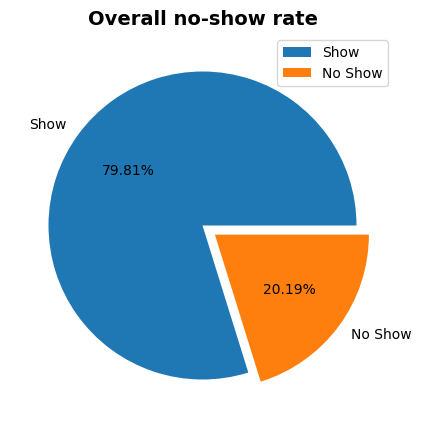

In [34]:
# inspect the overall no-show rate to build a standard for the compare
df['no_show'].value_counts().plot(kind='pie', explode=(0, 0.1), autopct='%1.2f%%', figsize=(14,5));
# Add legend
plt.legend();
# Remove y-axis label
plt.ylabel('')
# add main title
plt.title(f'Overall no-show rate', fontsize=14, weight='bold');

> We can use the chart above to compare the other factors affecting the no-show rate. Overall, the no-show rate will be around 20%.

### Research Question 2: Is there a difference in the no-show rates between male and female patients?

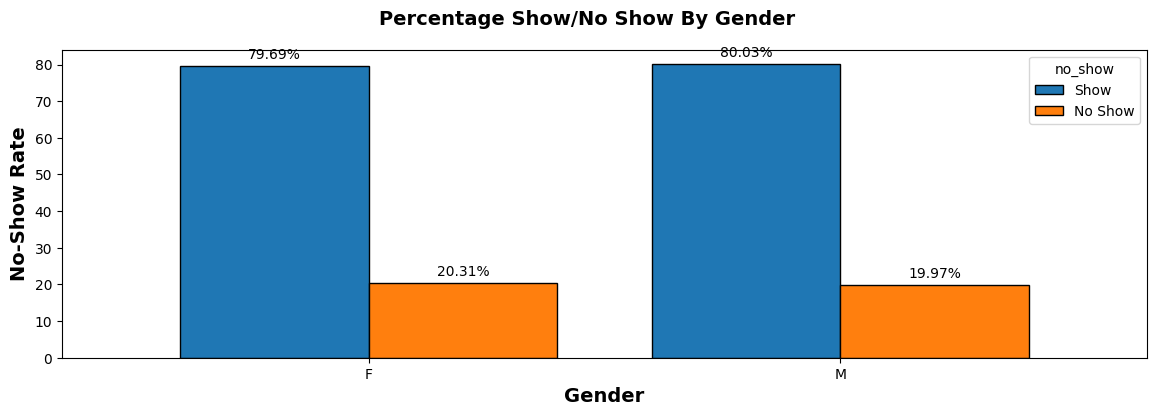

In [35]:
# Call bar plot function
myBarPlot2(df, 'gender')

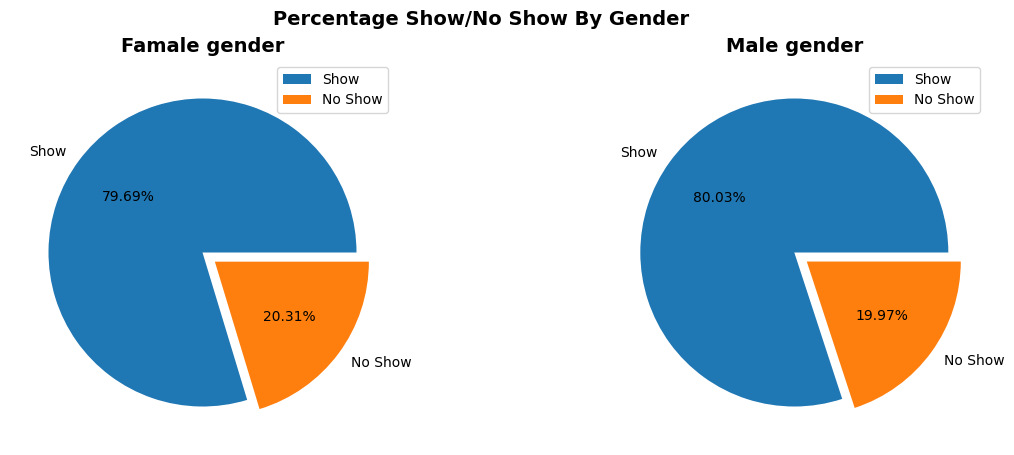

In [36]:
# call pie plot function
myPiePlot(df, 'gender', titles=['Famale', 'Male'])

> Look at the chart above; there's no significant difference between males and females in the no-show rates. I'm amazed by the result; I think there will be a difference between the genders.

### Research Question 3: Is there a relationship between the time gap from scheduling an appointment to the actual appointment and the likelihood of a no-show?

In [37]:
df.groupby('days_interval')['no_show'].value_counts()

days_interval  no_show
0-29 days      Show       81255
               No Show    18894
30-59 days     Show        5454
               No Show     2829
60-89 days     Show        1338
               No Show      540
90-119 days    Show         105
               No Show       27
120-149 days   Show          18
               No Show       11
150-179 days   Show          38
               No Show       18
Name: no_show, dtype: int64

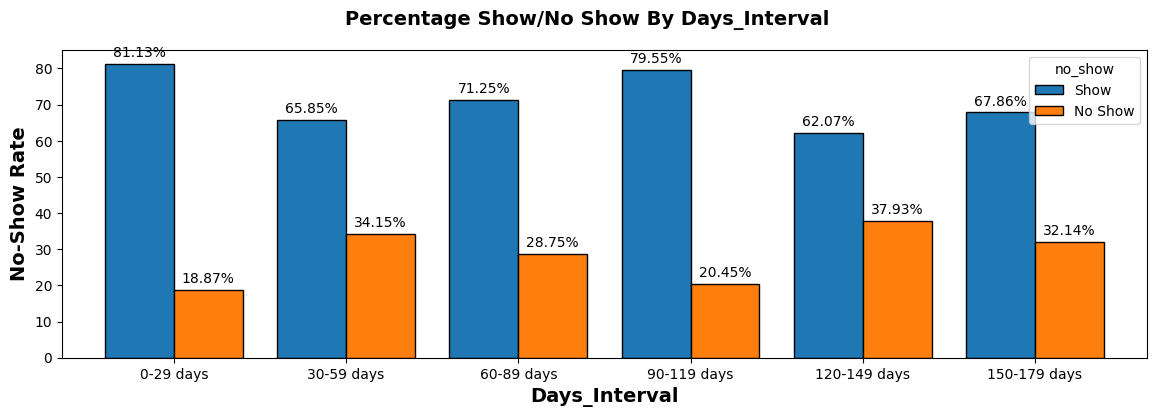

In [38]:
# call percentage bar plot
myBarPlot2(df, 'days_interval')

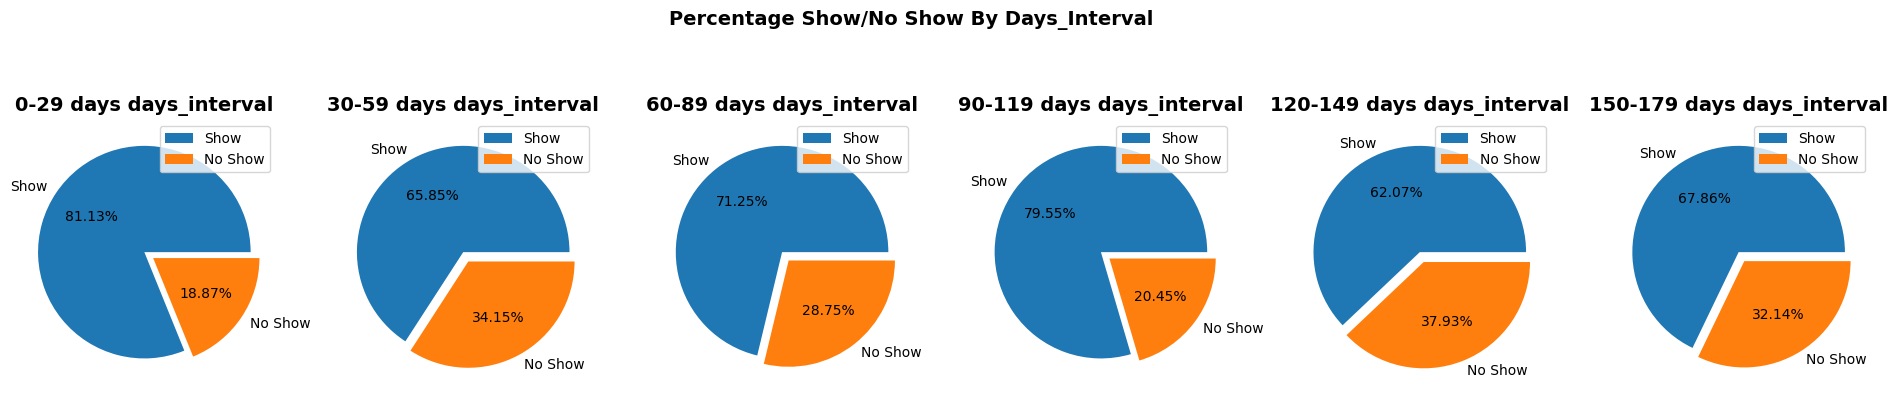

In [39]:
# call pie plot function
myPiePlot(df, 'days_interval', titles=labels, figsize=(24,5))

> Look at the chart above; we can see that most patients are booking at the three intervals between 0-29 and 60-89 days. You will see that the no-show rate will increase once the interval is over 30 days. But in 90-119 days interval, there is no big difference compared to the overall no-show rate, which surprised me. Suppose we want to know more about this interval. In that case, we need to add another factor to inspect the difference between 90-119 compared to others.

### Research Question 4: How does the age of the patient correlate with the likelihood of a no-show?

In [40]:
df.groupby('age_group')['no_show'].value_counts()

age_group  no_show
0-19       Show       24753
           No Show     7096
20-39      Show       22209
           No Show     6626
40-59      Show       24490
           No Show     5591
60-79      Show       14373
           No Show     2537
80-99      Show        2379
           No Show      466
100-120    Show           4
           No Show        3
Name: no_show, dtype: int64

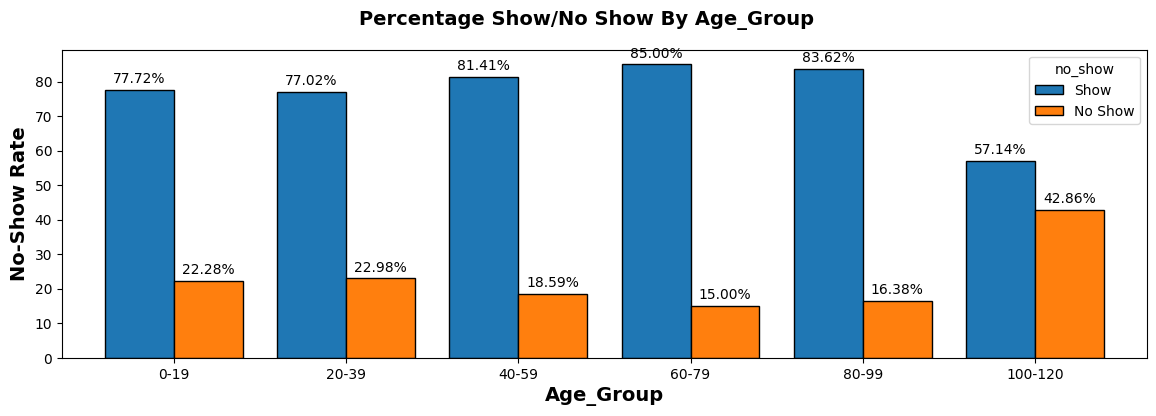

In [41]:
# call percentage bar plot
myBarPlot2(df, 'age_group')

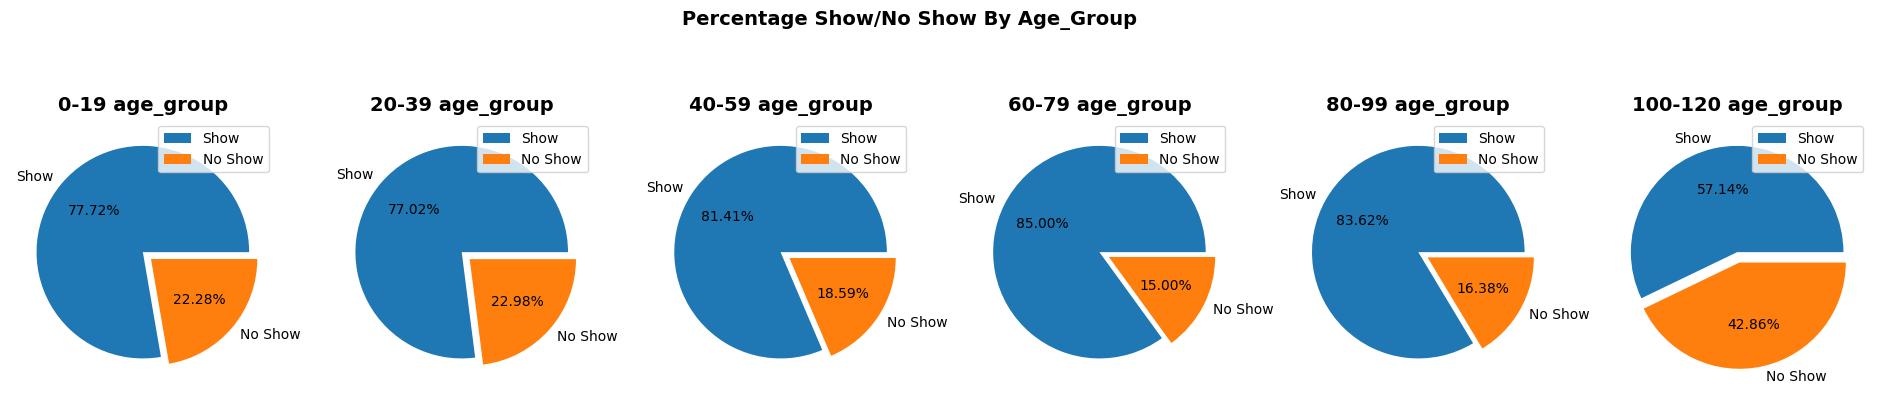

In [42]:
# call plot function
myPiePlot(df, 'age_group', titles=['0-19', '20-39', '40-59', '60-79', '80-99', '100-120'], figsize=(24,5))

> Look at the chart above; we can see that once a patient is over 40 years old, the no-show rate starts to decrease.
As we age, we will value our appointments more. Despite this, we do not know the difference between the young patient and the others in this dataset regarding their socio-economic or environmental factors. And the `150-179 age group` only includes 7 cases, so we don't count it as valid data.

### Research Question 5: Are there specific neighborhoods where the no-show rate is higher?(Top 5)

In [43]:
# Calculate the total appointments for each neighborhood.
total_appointments = df['neighbourhood'].value_counts()
total_appointments.head()

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64

In [44]:
# Calculate the number of no-show appointments for each neighborhood.
no_show_counts_neigh = df_noshow['neighbourhood'].value_counts()
no_show_counts_neigh.head()

JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        906
CENTRO             703
Name: neighbourhood, dtype: int64

In [45]:
# Calculate the no-show rate for each neighborhood.
no_show_rate_neigh = (no_show_counts_neigh / total_appointments).sort_values(ascending=False)
no_show_rate_neigh.head(6)

ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
Name: neighbourhood, dtype: float64

In [46]:
# Because there are the werid thing about the 'ILHAS OCEÂNICAS DE TRINDADE', so we check the top 6 neighbourhood's total appointments.
total_appointments[['ILHAS OCEÂNICAS DE TRINDADE', 'SANTOS DUMONT', 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'JESUS DE NAZARETH']]

ILHAS OCEÂNICAS DE TRINDADE       2
SANTOS DUMONT                  1276
SANTA CECÍLIA                   448
SANTA CLARA                     506
ITARARÉ                        3514
JESUS DE NAZARETH              2853
Name: neighbourhood, dtype: int64

In [47]:
# Because the 'ILHAS OCEÂNICAS DE TRINDADE' only has two appointments, so we exclude it.
top_5_no_show_neighborhoods = no_show_rate_neigh[['SANTOS DUMONT', 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'JESUS DE NAZARETH']]

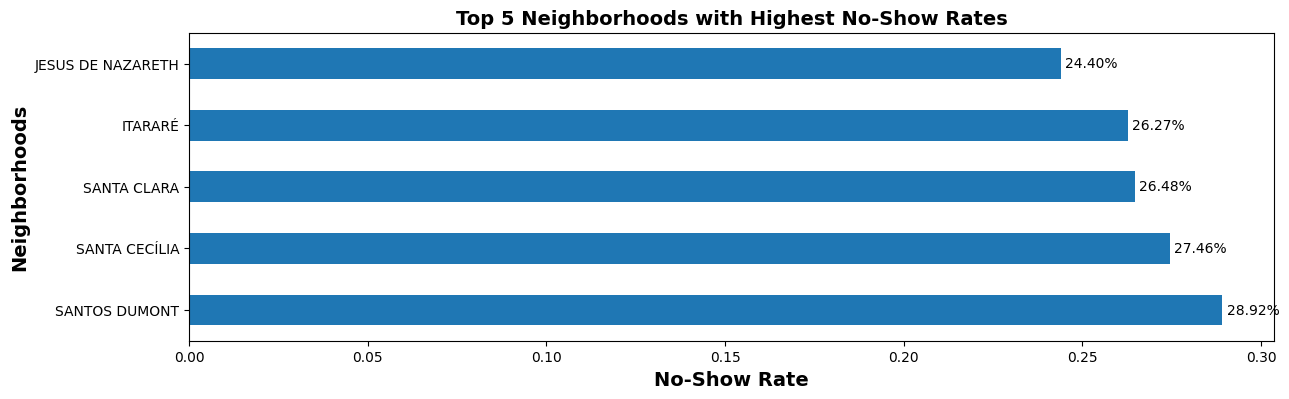

In [48]:
# Plot the bar chart.
ax = top_5_no_show_neighborhoods.plot(kind='barh', figsize=(14, 4));

# add main title
plt.title("Top 5 Neighborhoods with Highest No-Show Rates", fontsize=14, weight='bold');

# Add x label
plt.xlabel('No-Show Rate'.title(),
               fontsize = 14, weight = "bold");

# Add y label
plt.ylabel('Neighborhoods'.title(),
               fontsize = 14, weight = "bold");

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2%}',  # Format the width as a percentage
                xy=(width, p.get_y() + p.get_height() / 2.),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center', fontsize=10)

> Look at the chart above; we can find the top five no-show rate from the neighborhoods is 'SANTOS DUMONT', 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'JESUS DE NAZARETH'.

### Research Question 6: Does having a scholarship (Bolsa Família) influence the likelihood of a no-show?

In [49]:
df['scholarship'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

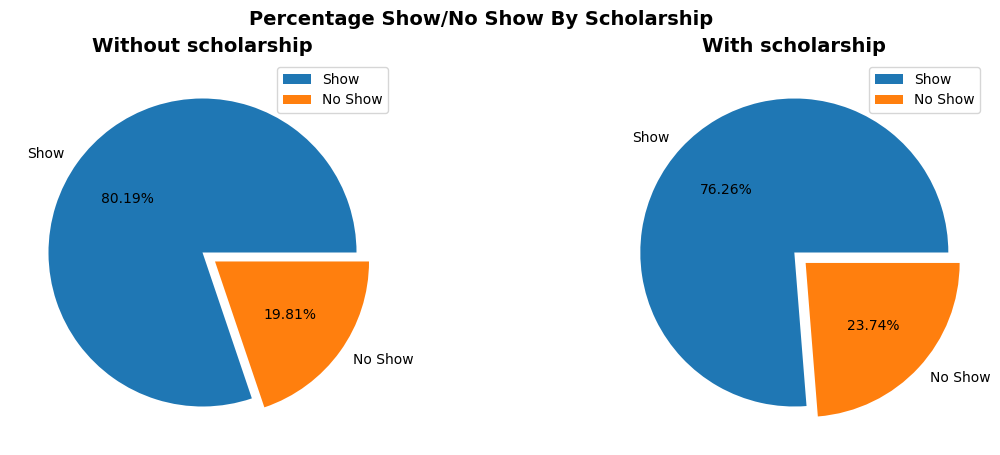

In [50]:
# call pie plot function
myPiePlot(df, 'scholarship')

> Look at the chart above; although there is no significant difference between having a scholarship and the no-show rates, it shows that having a scholarship does increase the no-show rate. This scholarship provided financial aid to poor Brazilian families, so socio-economic may affect the no-show rate

### Research Question 7: Is there a relationship between each health conditions (e.g., hypertension, diabetes) and no-show appointments?

In [ ]:
# call pie plot function of hypertension
myPiePlot(df, 'hypertension')

In [ ]:
# call pie plot function of diabetes
myPiePlot(df, 'diabetes')

In [ ]:
# call pie plot function of alcoholism
myPiePlot(df, 'alcoholism')

In [ ]:
# call pie plot function of handicap
myPiePlot(df, 'handicap_new')

> Look at the chart above; no significant difference between having each health condition will affect the no-show rates. But it is interest that having a health condition decreases the no-show rate a bit; they may be more frequent in seeing the doctor. Suppose we want to find out the reason. In that case, we need to check further whether there is a difference in the frequency of appointments between these two groups(having health conditions or not).

### Research Question 8: Which health condition combinations affect no-show appointments the most?

In [ ]:
# Query no-show == 'Yes', and all the health conditions.
no_show_rate_conditions = df.groupby(['hypertension', 'diabetes', 'alcoholism', 'handicap_new'])['no_show'].value_counts(normalize=True).unstack()['No Show'].rename('No show rate').to_frame()
no_show_rate_conditions

In [ ]:
# move the row indexes to columns
no_show_rate_conditions = no_show_rate_conditions.reset_index().copy()

# New variable, sum the number of conditions (only needed to order the data)
no_show_rate_conditions['num_conditions'] = no_show_rate_conditions[['hypertension', 'diabetes', 'alcoholism', 'handicap_new']].sum(axis=1)

no_show_rate_conditions['num_conditions'].head()

In [ ]:
# new dataframe, sort by the number of conditions, then drop that variable
df_test = no_show_rate_conditions.sort_values(by = 'num_conditions').drop('num_conditions', axis=1)

df_test.head()

In [ ]:
# New variable: multiply the column names by the values (0*any_condition will not show)
df_test['conditions'] = df_test[['hypertension', 'diabetes', 'alcoholism', 'handicap_new']].dot(df_test.columns[:-1] + ', ').str.rstrip(', ')

df_test['conditions']

In [ ]:
# Sort the DataFrame by the 'No show rate' column
df_test_sorted = df_test.sort_values(by='No show rate', ascending=True)

# Plot the sorted DataFrame
ax = df_test_sorted.plot.barh(x='conditions', y='No show rate', edgecolor='black', figsize=[14, 4], rot=0, width=0.8);

# add main title
plt.title("The No-Show Rates of health condition combinations".title(), fontsize=14, weight='bold');

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2%}',  # Format the width as a percentage
                xy=(width, p.get_y() + p.get_height() / 2.),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center', fontsize=10)

> Look at the chart above; exclude the outlier. When a patient has all the health conditions, we can find that it affects the no-show rate the most, over 30%. However, the no-show rate decreases when other combinations of health conditions are involved. We need to know more about the degree or severity of each condition. Then we can study further.

### Research Question 9:  Does receiving one or more SMS messages affect the no-show rate?

In [ ]:
# call pie plot function
myPiePlot(df, 'sms_received')

> Look at the chart above; interestingly, the patients who received SMS messages were more accessible to no-show than those who did not receive the messages. We need to know what content and how many times they have received them to study further.

<a id='conclusions'></a>
## Conclusions

According to the research above, we found that `Appointment scheduling interval`, `age`, `neighborhoods`, `health condition combinations` and `SMS` will affect the no-show rate.

Some situations will decrease the no-show rate beyond our thought. For instance, the no-show rate will increase when a patient receives an SMS message.

It shows that there are some factors we do not know to study further. 


Our findings:


**1. What is the overall percentage of no-show appointments?¶**

The overall no-show rate is 20.19%.

**2. Is there a difference in the no-show rates between male and female patients?**

There is no significant difference between males and females in terms of no-show rates.

**3. Is there a relationship between the time gap from scheduling an appointment to the actual appointment and the likelihood of a no-show?**

The no-show rate will increase once the interval is over 30 days.

**4. How does the age of the patient correlate with the likelihood of a no-show?**

Once a patient is over 40 years old, the no-show rate starts to decrease.

**5. Are there specific neighborhoods where the no-show rate is higher?(Top 5)**

The neighborhoods with the top five no-show rates are 'SANTOS DUMONT', 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', and 'JESUS DE NAZARETH'.

**6: Does having a scholarship (Bolsa Família) influence the likelihood of a no-show?**

Although there is no significant difference between having a scholarship and the no-show rates, it shows that having a scholarship does increase the no-show rate.

**7. Is there a relationship between each health conditions (e.g., hypertension, diabetes) and no-show appointments?**

There is no significant difference between having each health condition will affect the no-show rates. But it is interest that having a health condition decreases the no-show rate a bit.

**8: Which health condition combinations affect no-show appointments the most?**

When a patient has all the health conditions, we can find that it affects the no-show rate the most, over 30%. However, the no-show rate decreases when other combinations of health conditions are involved.

**9. Does receiving one or more SMS messages affect the no-show rate?**

Surprisingly, patients who received SMS messages were more likely to miss their appointments than those who did not receive messages.

These findings provide valuable insights into factors influencing no-show rates, allowing for more targeted strategies to reduce appointment non-attendance.


### Limitations

There are some limitations:

**1. SMS Message Interpretation:**

We only know SMS messages have been sent to the patient, but we need to know when or how many times they have received them.

**2. Limited Health Conditions:**

The analysis focused on specific health conditions (hypertension, diabetes, alcoholism). It might overlook the impact of other health factors or a combination of multiple conditions and the degree or severity of each condition.

**3. Neighborhood Characteristics:**

It doesn't delve into the socio-economic or environmental factors that might influence patient behavior in those areas. And the distance between home and the hospital.

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb